# Research notebook

Exploring the data and trying to find some interesting insights.

In [25]:
#Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot diagrams and charts
from pathlib import Path # to handle paths
pd.options.display.max_colwidth = 100 # to display full text in columns

## Look how exactly the data is structured

In [26]:
# Define the data path
ROOT_DATA_DIR = Path("../../data")
TRAIN_PATH = ROOT_DATA_DIR / "train.csv"
VALID_PATH = ROOT_DATA_DIR / "valid.csv"
TEST_PATH = ROOT_DATA_DIR / "test.csv"
train_df = pd.read_csv(TRAIN_PATH)
valid_df = pd.read_csv(VALID_PATH)
test_df = pd.read_csv(TEST_PATH)

In [27]:
train_df.head()

,id,keyword,location,text,target
0,6568,injury,"Plano, Texas",'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j,0
1,4107,drought,Nigeria,w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3,1
2,4448,electrocuted,NaN,When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol,0
3,5330,fire,Canada,I'm On Fire. http://t.co/WATsmxYTVa,0
4,7552,outbreak,Indonesia,More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are t...,1


In [28]:
valid_df.head()

,id,keyword,location,text,target
0,3796,destruction,NaN,So you have a new weapon that can cause un-imaginable destruction.,1
1,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons...,0
2,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool St...,1
3,191,aftershock,NaN,Aftershock back to school kick off was great. I want to thank everyone for making it possible. W...,0
4,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerab...,0


In [29]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6851 non-null   int64 
 1   keyword   6795 non-null   object
 2   location  4587 non-null   object
 3   text      6851 non-null   object
 4   target    6851 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 267.7+ KB


In [31]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        762 non-null    int64 
 1   keyword   757 non-null    object
 2   location  493 non-null    object
 3   text      762 non-null    object
 4   target    762 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 29.9+ KB


In [32]:
train_df.describe()

,id,target
count,6851.000000,6851.000000
mean,5441.738870,0.428405
std,3129.847531,0.494884
min,1.000000,0.000000
25%,2733.500000,0.000000
50%,5417.000000,0.000000
75%,8139.500000,1.000000
max,10872.000000,1.000000


In [33]:
valid_df.describe()

,id,target
count,762.000000,762.000000
mean,5443.696850,0.440945
std,3203.818384,0.496826
min,28.000000,0.000000
25%,2744.250000,0.000000
50%,5353.500000,0.000000
75%,8215.750000,1.000000
max,10873.000000,1.000000


## Plot the data

In [34]:
# Function to plot the distribution of the labels
def plot_distribution(df, title):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    df["target"].value_counts().plot(kind="bar")
    # Add grid to plot
    plt.grid()
    # Add label to x-axis
    plt.xlabel("Labels")
    # Add label to y-axis
    plt.ylabel("Count")
    # Add legend
    plt.legend()
    plt.show()

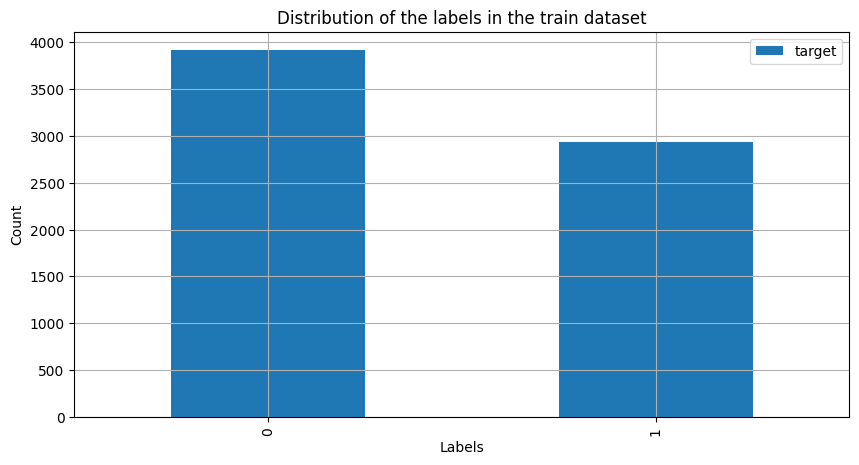

In [35]:
# Plot the distribution of the labels in the train dataset
plot_distribution(train_df, "Distribution of the labels in the train dataset")

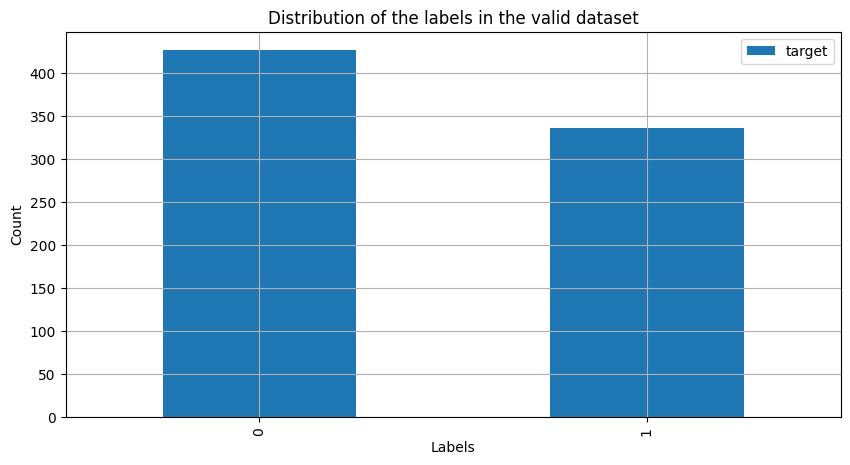

In [36]:
# Plot the distribution of the labels in the valid dataset
plot_distribution(valid_df, "Distribution of the labels in the valid dataset")

In [37]:
# Look at tweets about disaster
train_df[train_df['target']==1]['text'].head(10)

1                           w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3
4     More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are t...
6     http://t.co/c1H7JECFrV @RoyalCarribean do your passengers know about the mass murder that takes ...
12    @ChristieC733 please support this Please cosponsor S. 928 and support aid for sick and injured 9...
13                    Police Officer Wounded Suspect Dead After Exchanging Shots - http://t.co/iPHaZV47g7
14    Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co...
15    3 Former Executives to Be Prosecuted in Fukushima Nuclear #Disaster.\n\nThe story: http://t.co/7...
18    @JewhadiTM It is almost amazing to think someone thought suicide bombing would actually be a goo...
27    When you go to a concert and someone screams in your ear... Does it look like I wanna loose my h...
28    Christian Attacked by Muslims at the Tem

In [39]:
# Look at tweets about NOT disaster
train_df[train_df['target']==0]['text'].head(10)

0                 'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j
2                   When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol
3                                                                    I'm On Fire.  http://t.co/WATsmxYTVa
5     Why do u ruin everything?  @9tarbox u ruined the sour cream and u put a brick of cheese in the f...
7     WACKOES like #MicheleBachman predict the WORLD will SOON be OBLITERATED by a burning firey INFER...
8     @Reuters people like you should be charged after the inevitable rioting for contributing to it w...
9     Remove the http://t.co/2nS5TfnxpA and Linkury Browser Hijacker http://t.co/W2kVScbTLp http://t.c...
10    Cute &amp; all livin' the life then you zoom in on one's face and you have a meme ready: 'I've s...
11                              @Blizzard_draco @LoneWolffur also me please I would very much like a link
16    @realDonaldTrump to obliterate notion &a

## Look at the location features

In [40]:
# Let's look at data where locations are different from null
train_df[train_df['location'].notna()]

,id,keyword,location,text,target
0,6568,injury,"Plano, Texas",'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j,0
1,4107,drought,Nigeria,w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3,1
3,5330,fire,Canada,I'm On Fire. http://t.co/WATsmxYTVa,0
4,7552,outbreak,Indonesia,More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are t...,1
5,8375,ruin,"Winnipeg, Manitoba",Why do u ruin everything? @9tarbox u ruined the sour cream and u put a brick of cheese in the f...,0
...,...,...,...,...,...
6839,7613,pandemonium,Houston TX,Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/xRP0rTkFfJ,1
6843,4438,electrocute,"Texas, USA",I would like to electrocute everyone who uses the word 'fair' in connection with income tax poli...,0
6845,7412,obliterated,"Waterloo, ON",This the same dude that obliterated meek mill. Dont judge a book by its cover. http://t.co/BabMf...,0
6846,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration servers but I always like to play when there are :D,0


In [41]:
# Find out freq of tweets locations
freq_of_tweets_locations = train_df[train_df['location'].notna()]['location'].value_counts()
# Restrict data to cities where were made more than 10 tweets
freq_of_tweets_locations = freq_of_tweets_locations[freq_of_tweets_locations.values>10].to_frame()
freq_of_tweets_locations.columns = ["total_number_of_tweets"]

In [42]:
#Sum number of disasters in certain locations
freq_of_tweets_locations['sum_of_disaster'] = [train_df[train_df['location'] == x]['target'].sum() for x in freq_of_tweets_locations.index]

In [43]:
freq_of_tweets_locations.head()

,total_number_of_tweets,sum_of_disaster
USA,94,61
New York,59,14
United States,50,27
London,45,16
Canada,27,12


In [44]:
# Create a new column based on index named 'location' and reset index
freq_of_tweets_locations['location'] = freq_of_tweets_locations.index
freq_of_tweets_locations.reset_index(inplace=True, drop=True)

In [45]:
# Convert countries to continents to achieve better generalization of the data
import pycountry_convert as pc
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app_name")

In [46]:
#Define a function for converting country into continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    except:
        location = geolocator.geocode(freq_of_tweets_locations['location'][0])
        revers_location = geolocator.reverse(f'{location.latitude},{location.longitude}')
        country_name = revers_location.address.split(', ')[-1]
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    finally:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [ ]:
# Add columnt with continent names
freq_of_tweets_locations['continent'] = freq_of_tweets_locations.apply(lambda x: country_to_continent(x['location']), axis=1)